In [49]:
#install Dependencies

In [1]:
!pip install torch==1.8.2 torchvision==0.9.2 torchaudio===0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cpu

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/lts/1.8/cpu


In [3]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
#import model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\jerem/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-11-4 Python-3.9.13 torch-1.8.2+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [22]:
!pip install pyqt5
!pip install lxml

Defaulting to user installation because normal site-packages is not writeable
  Using cached PyQt5-5.15.7-cp37-abi3-win_amd64.whl (6.8 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
spyder 5.2.2 requires pyqt5<5.13, but you have pyqt5 5.15.7 which is incompatible.


In [ ]:
#use labelimg to annotate images

In [23]:
import os
import time

In [24]:
!cd labelimg && pyrcc5 -o libs/resources.py resources.qrc

In [33]:
!cd labelimg && python labelImg.py

In [ ]:
#retrain model with custom data

In [40]:
!python train.py --img 640 --batch 16 --epochs 200 --data dataset.yml --weights yolov5s.pt

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2022-11-4 Python-3.9.13 torch-1.8.2+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1

In [ ]:
#load model

In [44]:
model = torch.hub.load('ultralytics/yolov5','custom', path='runs/train/exp8/weights/last.pt')

Using cache found in C:\Users\jerem/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-11-4 Python-3.9.13 torch-1.8.2+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7061368 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [ ]:
#pass image/video to model to perform detections

In [59]:
results.print

<bound method Detections.print of YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 275x160 (no detections)
Speed: 402.6ms pre-process, 262.2ms inference, 1.0ms NMS per image at shape (1, 3, 640, 384)>

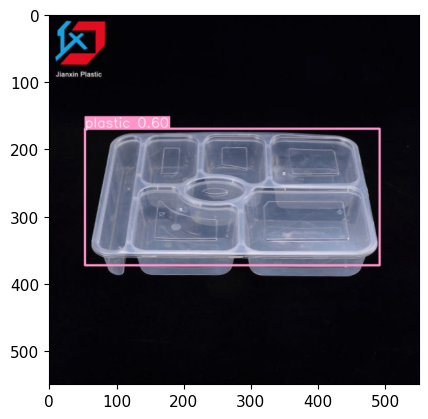

In [73]:
img = 'https://image.made-in-china.com/202f0j00DUfRaPozmBqp/Disposable-Plastic-Container-with-7-Compartments.jpg' #file path
results = model(img)
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
#realtime detection with webcam

In [46]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()